In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#load data train
df = pd.read_csv('dataset/train.csv')

df

,label,NOSE_x,NOSE_y,NOSE_z,NOSE_visibility,LEFT_SHOULDER_x,LEFT_SHOULDER_y,LEFT_SHOULDER_z,LEFT_SHOULDER_visibility,RIGHT_SHOULDER_x,...,RIGHT_KNEE_z,RIGHT_KNEE_visibility,LEFT_ANKLE_x,LEFT_ANKLE_y,LEFT_ANKLE_z,LEFT_ANKLE_visibility,RIGHT_ANKLE_x,RIGHT_ANKLE_y,RIGHT_ANKLE_z,RIGHT_ANKLE_visibility
0,1.0,0.566628,0.215825,-0.179164,0.999983,0.603728,0.310659,0.009625,0.999969,0.515302,...,-0.018046,0.994093,0.583166,0.914074,0.129855,0.989608,0.550327,0.910379,0.112435,0.993049
1,1.0,0.566143,0.215827,-0.166491,0.999982,0.603697,0.310681,0.032897,0.999968,0.515275,...,-0.027877,0.993640,0.583169,0.915207,0.129954,0.988759,0.549618,0.911830,0.104301,0.992580
2,1.0,0.565114,0.216485,-0.167129,0.999982,0.603651,0.311274,0.027464,0.999966,0.515112,...,-0.026802,0.993451,0.583109,0.915970,0.136486,0.988204,0.549167,0.912555,0.112636,0.992348
3,1.0,0.564665,0.218071,-0.178488,0.999981,0.603564,0.312767,0.024608,0.999965,0.514824,...,-0.027260,0.993313,0.582990,0.915961,0.139435,0.987626,0.549021,0.912643,0.116197,0.992105
4,1.0,0.564257,0.219991,-0.219889,0.999980,0.603501,0.314149,-0.001277,0.999963,0.514392,...,-0.022762,0.993191,0.582212,0.915911,0.152998,0.986772,0.548943,0.912549,0.134366,0.991728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17407,0.0,0.506316,0.130152,-0.281515,0.999983,0.552153,0.248577,-0.063084,0.999896,0.455341,...,0.005616,0.996638,0.548200,0.868649,0.186076,0.994231,0.458890,0.873478,0.156291,0.996436
17408,0.0,0.506389,0.125906,-0.276450,0.999983,0.551215,0.245856,-0.071266,0.999893,0.454812,...,0.005915,0.996662,0.547458,0.866486,0.169546,0.994282,0.458107,0.868949,0.153682,0.996503
17409,0.0,0.506100,0.119856,-0.289413,0.999982,0.550659,0.239843,-0.089731,0.999887,0.453896,...,0.009283,0.996628,0.546583,0.858204,0.180645,0.994244,0.457531,0.861787,0.154664,0.996517
17410,0.0,0.504839,0.114473,-0.284251,0.999980,0.549181,0.232904,-0.085296,0.999883,0.452999,...,0.013782,0.996513,0.544935,0.850807,0.185347,0.993994,0.455116,0.853462,0.169072,0.996392


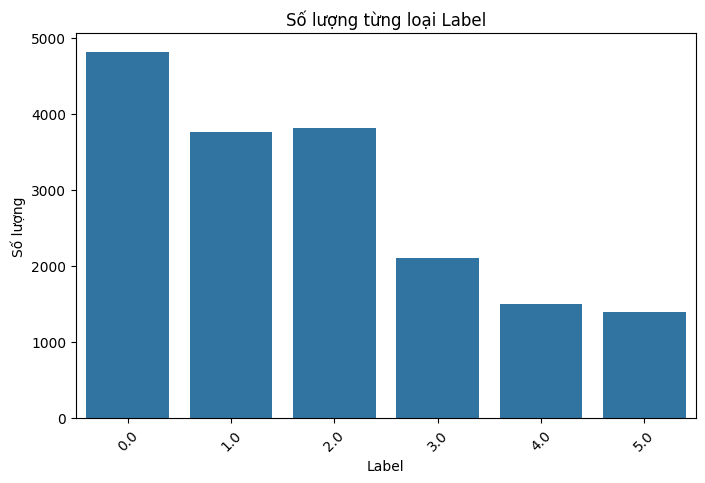

In [81]:
# Đếm số lượng từng loại label
label_counts = df["label"].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)

# Thêm tiêu đề và nhãn
plt.xlabel("Label")
plt.ylabel("Số lượng")
plt.title("Số lượng từng loại Label")
plt.xticks(rotation=45)  # Xoay nhãn trục X nếu cần

# Hiển thị biểu đồ
plt.show()

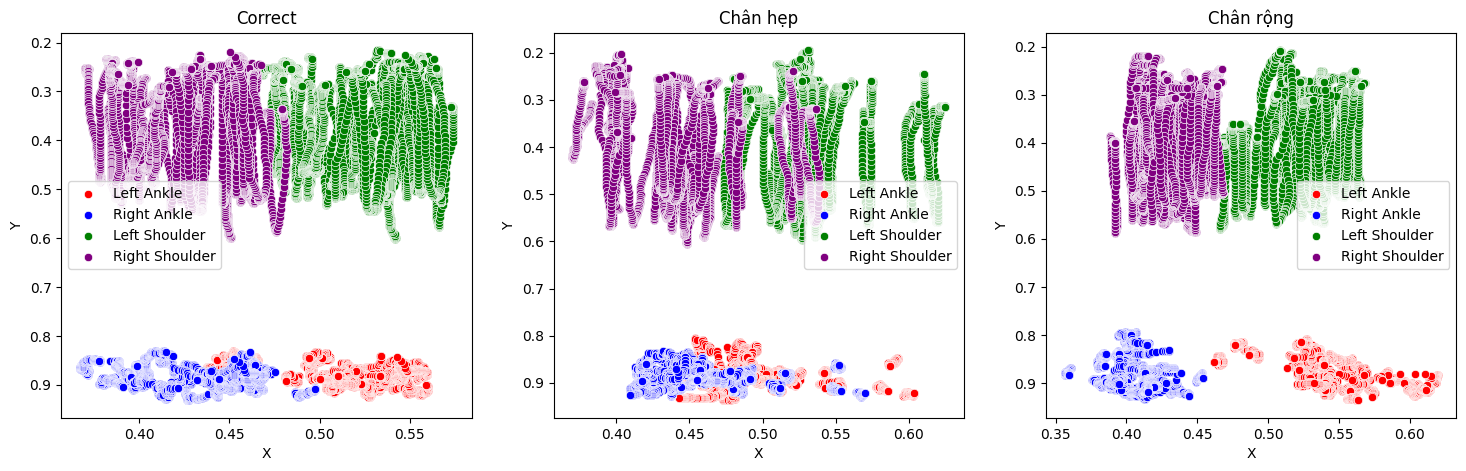

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy label và vị trí 2 chân
df0 = df[df['label'] == 0]
df1 = df[df['label'] == 1]
df2 = df[df['label'] == 2]

# Tạo figure với 3 đồ thị
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Định nghĩa màu sắc mới
colors = {
    "LEFT_ANKLE": "red",
    "RIGHT_ANKLE": "blue",
    "LEFT_SHOULDER": "green",
    "RIGHT_SHOULDER": "purple"
}

# Biểu diễn dữ liệu Correct
sns.scatterplot(x=df0['LEFT_ANKLE_x'], y=df0['LEFT_ANKLE_y'], ax=axes[0], color=colors["LEFT_ANKLE"], label='Left Ankle')
sns.scatterplot(x=df0['RIGHT_ANKLE_x'], y=df0['RIGHT_ANKLE_y'], ax=axes[0], color=colors["RIGHT_ANKLE"], label='Right Ankle')
sns.scatterplot(x=df0['LEFT_SHOULDER_x'], y=df0['LEFT_SHOULDER_y'], ax=axes[0], color=colors["LEFT_SHOULDER"], label='Left Shoulder')
sns.scatterplot(x=df0['RIGHT_SHOULDER_x'], y=df0['RIGHT_SHOULDER_y'], ax=axes[0], color=colors["RIGHT_SHOULDER"], label='Right Shoulder')

axes[0].set_title('Correct')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].invert_yaxis()  # Đảo ngược trục Y

# Biểu diễn dữ liệu lỗi chân hẹp
sns.scatterplot(x=df1['LEFT_ANKLE_x'], y=df1['LEFT_ANKLE_y'], ax=axes[1], color=colors["LEFT_ANKLE"], label='Left Ankle')
sns.scatterplot(x=df1['RIGHT_ANKLE_x'], y=df1['RIGHT_ANKLE_y'], ax=axes[1], color=colors["RIGHT_ANKLE"], label='Right Ankle')
sns.scatterplot(x=df1['LEFT_SHOULDER_x'], y=df1['LEFT_SHOULDER_y'], ax=axes[1], color=colors["LEFT_SHOULDER"], label='Left Shoulder')
sns.scatterplot(x=df1['RIGHT_SHOULDER_x'], y=df1['RIGHT_SHOULDER_y'], ax=axes[1], color=colors["RIGHT_SHOULDER"], label='Right Shoulder')

axes[1].set_title('Chân hẹp')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].invert_yaxis()

# Biểu diễn dữ liệu lỗi chân rộng
sns.scatterplot(x=df2['LEFT_ANKLE_x'], y=df2['LEFT_ANKLE_y'], ax=axes[2], color=colors["LEFT_ANKLE"], label='Left Ankle')
sns.scatterplot(x=df2['RIGHT_ANKLE_x'], y=df2['RIGHT_ANKLE_y'], ax=axes[2], color=colors["RIGHT_ANKLE"], label='Right Ankle')
sns.scatterplot(x=df2['LEFT_SHOULDER_x'], y=df2['LEFT_SHOULDER_y'], ax=axes[2], color=colors["LEFT_SHOULDER"], label='Left Shoulder')
sns.scatterplot(x=df2['RIGHT_SHOULDER_x'], y=df2['RIGHT_SHOULDER_y'], ax=axes[2], color=colors["RIGHT_SHOULDER"], label='Right Shoulder')

axes[2].set_title('Chân rộng')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')
axes[2].invert_yaxis()

# Hiển thị biểu đồ
plt.show()


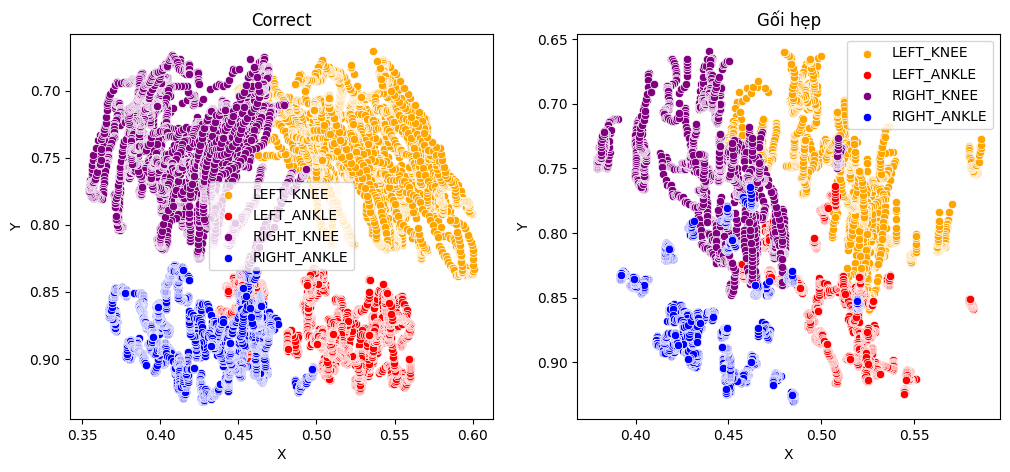

In [92]:
# Lấy label và vị trí 2 chân
df0 = df[df['label'] == 0]
df3 = df[df['label'] == 3]

# Tạo figure với 2 đồ thị
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Biểu diễn dữ liệu Correct
sns.scatterplot(x=df0['LEFT_KNEE_x'], y=df0['LEFT_KNEE_y'], ax=axes[0], color='orange', label='LEFT_KNEE')  # Cam 🟠
sns.scatterplot(x=df0['LEFT_ANKLE_x'], y=df0['LEFT_ANKLE_y'], ax=axes[0], color='red', label='LEFT_ANKLE')  # Đỏ 🔴

sns.scatterplot(x=df0['RIGHT_KNEE_x'], y=df0['RIGHT_KNEE_y'], ax=axes[0], color='purple', label='RIGHT_KNEE')  # Tím 🟣
sns.scatterplot(x=df0['RIGHT_ANKLE_x'], y=df0['RIGHT_ANKLE_y'], ax=axes[0], color='blue', label='RIGHT_ANKLE')  # Xanh 🔵

axes[0].set_title('Correct')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].invert_yaxis()  # Đảo ngược trục Y

# Biểu diễn dữ liệu lỗi gối hẹp
sns.scatterplot(x=df3['LEFT_KNEE_x'], y=df3['LEFT_KNEE_y'], ax=axes[1], color='orange', label='LEFT_KNEE')  # Cam 🟠
sns.scatterplot(x=df3['LEFT_ANKLE_x'], y=df3['LEFT_ANKLE_y'], ax=axes[1], color='red', label='LEFT_ANKLE')  # Đỏ 🔴

sns.scatterplot(x=df3['RIGHT_KNEE_x'], y=df3['RIGHT_KNEE_y'], ax=axes[1], color='purple', label='RIGHT_KNEE')  # Tím 🟣
sns.scatterplot(x=df3['RIGHT_ANKLE_x'], y=df3['RIGHT_ANKLE_y'], ax=axes[1], color='blue', label='RIGHT_ANKLE')  # Xanh 🔵

axes[1].set_title('Gối hẹp')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].invert_yaxis()  # Đảo ngược trục Y

# Hiển thị biểu đồ
plt.show()


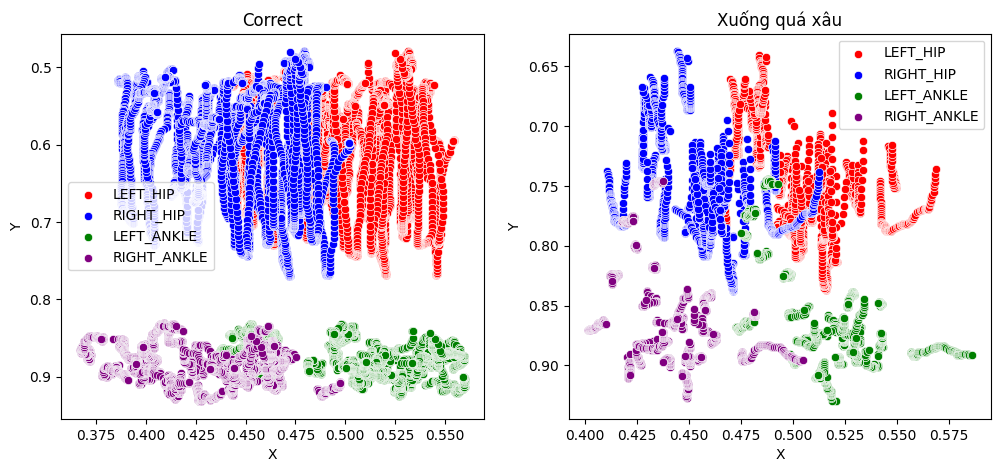

In [84]:

# Lấy label và vị trí 2 chân
df0 = df[df['label'] == 0]
df4 = df[df['label'] == 4]

# Tạo figure với 2 đồ thị
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Biểu diễn dữ liệu Correct
sns.scatterplot(x = df0['LEFT_HIP_x'], y = df0['LEFT_HIP_y'], ax = axes[0], color = 'red', label = 'LEFT_HIP')
sns.scatterplot(x = df0['RIGHT_HIP_x'], y = df0['RIGHT_HIP_y'], ax = axes[0], color = 'blue', label = 'RIGHT_HIP')
sns.scatterplot(x = df0['LEFT_ANKLE_x'], y = df0['LEFT_ANKLE_y'], ax = axes[0], color = 'green', label = 'LEFT_ANKLE')
sns.scatterplot(x = df0['RIGHT_ANKLE_x'], y = df0['RIGHT_ANKLE_y'], ax = axes[0], color = 'purple', label = 'RIGHT_ANKLE')
axes[0].set_title('Correct')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].invert_yaxis()  # Đảo ngược trục Y

# Biểu diễn dữ liệu lỗi gối hẹp
sns.scatterplot(x = df4['LEFT_HIP_x'], y = df4['LEFT_HIP_y'], ax = axes[1], color = 'red', label = 'LEFT_HIP')
sns.scatterplot(x = df4['RIGHT_HIP_x'], y = df4['RIGHT_HIP_y'], ax = axes[1], color = 'blue', label = 'RIGHT_HIP')
sns.scatterplot(x = df4['LEFT_ANKLE_x'], y = df4['LEFT_ANKLE_y'], ax = axes[1], color = 'green', label = 'LEFT_ANKLE')
sns.scatterplot(x = df4['RIGHT_ANKLE_x'], y = df4['RIGHT_ANKLE_y'], ax = axes[1], color = 'purple', label = 'RIGHT_ANKLE')
axes[1].set_title('Xuống quá xâu')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].invert_yaxis()  # Đảo ngược trục Y

# Hiển thị biểu đồ
plt.show()

In [85]:
#Tính góc giữa 3 điểm trong không gian 3D
def calculate_angle(pointA, pointB, pointC) -> float:
    """
    Tính góc giữa ba điểm trong không gian 3D (đơn vị: độ)
    a, b, c là danh sách chứa tọa độ 3D: [x, y, z]
    """

    #Độ sâu ảnh
    t = 33;
    A = np.array([pointA[0], pointA[1], pointA[2]/2])  # (xA, yA, zA)
    B = np.array([pointB[0], pointB[1], pointB[2]/2 ])  # (xB, yB, zB)
    C = np.array([pointC[0], pointC[1], pointC[2]/2])  # (xC, yC, zC)

    # Vector BA và BC
    BA = A - B
    BC = C - B

    # Tính tích vô hướng
    dot_product = np.dot(BA, BC)
    
    # Tính độ dài vector
    norm_BA = np.linalg.norm(BA)
    norm_BC = np.linalg.norm(BC)

    # Tính góc bằng công thức cos(theta) = (A.B) / (|A| * |B|)
    cos_theta = dot_product / (norm_BA * norm_BC)
    
    # Chuyển từ radian sang độ
    angle = np.degrees(np.arccos(np.clip(cos_theta, -1.0, 1.0)))

    return angle

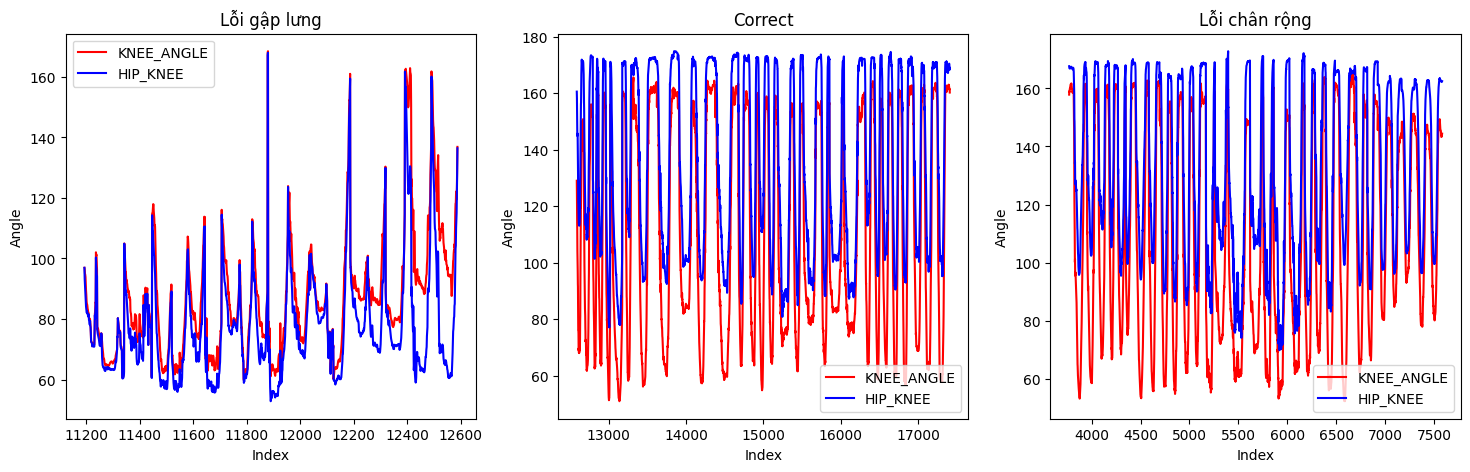

In [86]:
# Tạo bản sao để tránh lỗi SettingWithCopyWarning
df2 = df[df['label'] == 2].copy()
df5 = df[df['label'] == 5].copy()
df0 = df0.copy()

# Lấy góc giữa 3 điểm
df2.loc[:, 'LEFT_HIP_KNEE'] = df2.apply(lambda x: calculate_angle(
    [x['LEFT_SHOULDER_x'], x['LEFT_SHOULDER_y'], x['LEFT_SHOULDER_z'],],
    [x['LEFT_HIP_x'], x['LEFT_HIP_y'], x['LEFT_HIP_z'],],
    [x['LEFT_KNEE_x'], x['LEFT_KNEE_y'], x['LEFT_KNEE_z'],]), axis=1)

df2.loc[:, 'RIGHT_HIP_KNEE'] = df2.apply(lambda x: calculate_angle(
    [x['RIGHT_SHOULDER_x'], x['RIGHT_SHOULDER_y'], x['RIGHT_SHOULDER_z'],],
    [x['RIGHT_HIP_x'], x['RIGHT_HIP_y'], x['RIGHT_HIP_z'],],
    [x['RIGHT_KNEE_x'], x['RIGHT_KNEE_y'], x['RIGHT_KNEE_z'],]), axis=1)

df2.loc[:, 'HIP_KNEE'] = (df2['LEFT_HIP_KNEE'] + df2['RIGHT_HIP_KNEE']) / 2

# Lấy góc giữa 3 điểm
df2.loc[:, 'LEFT_KNEE_ANGKLE'] = df2.apply(lambda x: calculate_angle(
    [x['LEFT_HIP_x'], x['LEFT_HIP_y'], x['LEFT_HIP_z'],],
    [x['LEFT_KNEE_x'], x['LEFT_KNEE_y'], x['LEFT_KNEE_z'],],
    [x['LEFT_ANKLE_x'], x['LEFT_ANKLE_y'], x['LEFT_ANKLE_z'],]), axis=1)

df2.loc[:, 'RIGHT_KNEE_ANGLE'] = df2.apply(lambda x: calculate_angle(
    [x['RIGHT_HIP_x'], x['RIGHT_HIP_y'], x['RIGHT_HIP_z'],],
    [x['RIGHT_KNEE_x'], x['RIGHT_KNEE_y'], x['RIGHT_KNEE_z'],],
    [x['RIGHT_ANKLE_x'], x['RIGHT_ANKLE_y'], x['RIGHT_ANKLE_z'],]), axis=1)

df2.loc[:, 'KNEE_ANGLE'] = (df2['LEFT_KNEE_ANGKLE'] + df2['RIGHT_KNEE_ANGLE']) / 2

# Lấy góc đầu gối
df5.loc[:, 'LEFT_KNEE_ANGKLE'] = df5.apply(lambda x: calculate_angle(
    [x['LEFT_HIP_x'], x['LEFT_HIP_y'], x['LEFT_HIP_z']], 
    [x['LEFT_KNEE_x'], x['LEFT_KNEE_y'], x['LEFT_KNEE_z']], 
    [x['LEFT_ANKLE_x'], x['LEFT_ANKLE_y'], x['LEFT_ANKLE_z']]), axis=1)

df5.loc[:, 'RIGHT_KNEE_ANGLE'] = df5.apply(lambda x: calculate_angle(
    [x['RIGHT_HIP_x'], x['RIGHT_HIP_y'], x['RIGHT_HIP_z']], 
    [x['RIGHT_KNEE_x'], x['RIGHT_KNEE_y'], x['RIGHT_KNEE_z']], 
    [x['RIGHT_ANKLE_x'], x['RIGHT_ANKLE_y'], x['RIGHT_ANKLE_z']]), axis=1)

df5.loc[:, 'KNEE_ANGLE'] = (df5['LEFT_KNEE_ANGKLE'] + df5['RIGHT_KNEE_ANGLE']) / 2

# Lấy góc vai - hông - đầu gối
df5.loc[:, 'LEFT_HIP_KNEE'] = df5.apply(lambda x: calculate_angle(
    [x['LEFT_SHOULDER_x'], x['LEFT_SHOULDER_y'], x['LEFT_SHOULDER_z']], 
    [x['LEFT_HIP_x'], x['LEFT_HIP_y'], x['LEFT_HIP_z']], 
    [x['LEFT_KNEE_x'], x['LEFT_KNEE_y'], x['LEFT_KNEE_z']]), axis=1)

df5.loc[:, 'RIGHT_HIP_KNEE'] = df5.apply(lambda x: calculate_angle(
    [x['RIGHT_SHOULDER_x'], x['RIGHT_SHOULDER_y'], x['RIGHT_SHOULDER_z']], 
    [x['RIGHT_HIP_x'], x['RIGHT_HIP_y'], x['RIGHT_HIP_z']], 
    [x['RIGHT_KNEE_x'], x['RIGHT_KNEE_y'], x['RIGHT_KNEE_z']]), axis=1)

df5.loc[:, 'HIP_KNEE'] = (df5['LEFT_HIP_KNEE'] + df5['RIGHT_HIP_KNEE']) / 2

# Data đúng
df0.loc[:, 'LEFT_KNEE_ANGLE'] = df0.apply(lambda x: calculate_angle(
    [x['LEFT_HIP_x'], x['LEFT_HIP_y'], x['LEFT_HIP_z']], 
    [x['LEFT_KNEE_x'], x['LEFT_KNEE_y'], x['LEFT_KNEE_z']], 
    [x['LEFT_ANKLE_x'], x['LEFT_ANKLE_y'], x['LEFT_ANKLE_z']]), axis=1)

df0.loc[:, 'RIGHT_KNEE_ANGLE'] = df0.apply(lambda x: calculate_angle(
    [x['RIGHT_HIP_x'], x['RIGHT_HIP_y'], x['RIGHT_HIP_z']], 
    [x['RIGHT_KNEE_x'], x['RIGHT_KNEE_y'], x['RIGHT_KNEE_z']], 
    [x['RIGHT_ANKLE_x'], x['RIGHT_ANKLE_y'], x['RIGHT_ANKLE_z']]), axis=1)

df0.loc[:, 'KNEE_ANGLE'] = (df0['LEFT_KNEE_ANGLE'] + df0['RIGHT_KNEE_ANGLE']) / 2

df0.loc[:, 'LEFT_HIP_KNEE'] = df0.apply(lambda x: calculate_angle(
    [x['LEFT_SHOULDER_x'], x['LEFT_SHOULDER_y'], x['LEFT_SHOULDER_z']], 
    [x['LEFT_HIP_x'], x['LEFT_HIP_y'], x['LEFT_HIP_z']], 
    [x['LEFT_KNEE_x'], x['LEFT_KNEE_y'], x['LEFT_KNEE_z']]), axis=1)

df0.loc[:, 'RIGHT_HIP_KNEE'] = df0.apply(lambda x: calculate_angle(
    [x['RIGHT_SHOULDER_x'], x['RIGHT_SHOULDER_y'], x['RIGHT_SHOULDER_z']], 
    [x['RIGHT_HIP_x'], x['RIGHT_HIP_y'], x['RIGHT_HIP_z']], 
    [x['RIGHT_KNEE_x'], x['RIGHT_KNEE_y'], x['RIGHT_KNEE_z']]), axis=1)

df0.loc[:, 'HIP_KNEE'] = (df0['LEFT_HIP_KNEE'] + df0['RIGHT_HIP_KNEE']) / 2

# Vẽ đồ thị
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Biểu diễn dữ liệu lỗi 5 
sns.lineplot(x=df5.index, y=df5['KNEE_ANGLE'], ax=axes[0], color='red', label='KNEE_ANGLE')
sns.lineplot(x=df5.index, y=df5['HIP_KNEE'], ax=axes[0], color='blue', label='HIP_KNEE')
axes[0].set_title('Lỗi gập lưng')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Angle')

# Biểu diễn dữ liệu đúng
sns.lineplot(x=df0.index, y=df0['KNEE_ANGLE'], ax=axes[1], color='red', label='KNEE_ANGLE')
sns.lineplot(x=df0.index, y=df0['HIP_KNEE'], ax=axes[1], color='blue', label='HIP_KNEE')
axes[1].set_title('Correct')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Angle')

# Biểu diễn dữ liệu lỗi 2 
sns.lineplot(x=df2.index, y=df2['KNEE_ANGLE'], ax=axes[2], color='red', label='KNEE_ANGLE')
sns.lineplot(x=df2.index, y=df2['HIP_KNEE'], ax=axes[2], color='blue', label='HIP_KNEE')
axes[2].set_title('Lỗi chân rộng')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Angle')

# Hiển thị biểu đồ
plt.show()


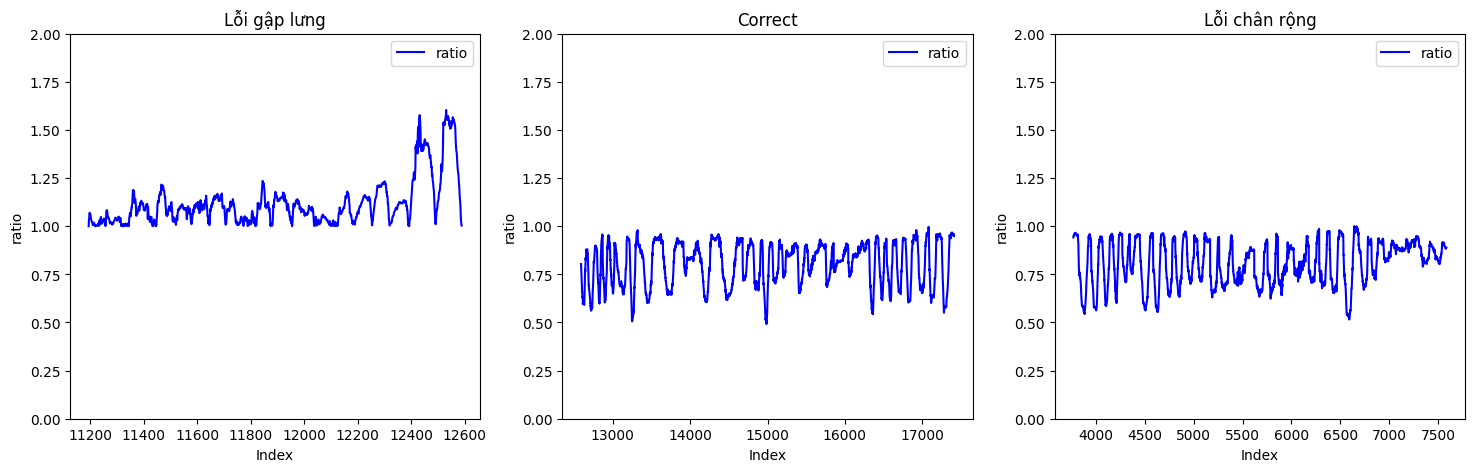

In [87]:
df2.loc[:, 'ratio'] = df2['KNEE_ANGLE'] / df2['HIP_KNEE']
df5.loc[:, 'ratio'] = df5['KNEE_ANGLE'] / df5['HIP_KNEE']
df0.loc[:, 'ratio'] = df0['KNEE_ANGLE'] / df0['HIP_KNEE']

# Vẽ đồ thị
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Biểu diễn dữ liệu lỗi
sns.lineplot(x=df5.index, y=df5['ratio'], ax=axes[0], color='blue', label='ratio')
axes[0].set_title('Lỗi gập lưng')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('ratio')
axes[0].set_ylim(0, 2)  # Giới hạn trục Y từ 0 đến 2

# Biểu diễn dữ liệu đúng
sns.lineplot(x=df0.index, y=df0['ratio'], ax=axes[1], color='blue', label='ratio')
axes[1].set_title('Correct')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('ratio')
axes[1].set_ylim(0, 2)  # Giới hạn trục Y từ 0 đến 2 

# Biểu diển dữ liệu lỗi 4
sns.lineplot(x=df2.index, y=df2['ratio'], ax=axes[2], color='blue', label='ratio')
axes[2].set_title('Lỗi chân rộng')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('ratio')
axes[2].set_ylim(0, 2)  # Giới hạn trục Y từ 0 đến 2

# Hiển thị biểu đồ
plt.show()